## Trabajo Practico 2

### ALTERNATIVA 2: Redes Convolucionales

Integrantes:

-   Silvia Ojeda
-   Mara Avendaño
-   Enzo Manolucos
-   Jose Zerda

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

## Normalizacion y Transformacion de las imagenes

- Cargamos el conjunto de datos de imágenes: usando la función `torchvision.datasets.ImageFolder`, que carga automáticamente todas las imágenes en una carpeta y las asigna a sus respectivas clases según los nombres de sus carpetas.
- Normalizamos el conjunto de datos: usando la función `transforms.Normalize` con los valores (mean std) que corresponden a los valores de media y desviacion standart de las imagenes


Transformamos las imagenes

In [1]:
# Define normalization parameters (mean and std) for pre-trained models
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

Los valores de mean = [0.485, 0.456, 0.406] y std = [0.229, 0.224, 0.225] corresponden a la media y desviación estándar de los canales RGB en los datasets más comúnmente utilizados para entrenar modelos pre-entrenados como:
-   ResNet
-   VGG
-   ImageNet.

In [3]:


# Define transforms for training, validation, and testing
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'valid': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

Cargamos el conunto de datos de imágenes. Ejegimos 10 clases de mariposas de las 100 que contiene el dataset. Por lo que nos queda 3 carpetas:

-   train
-   valid
-   test

In [4]:
# Define the directories
data_dir = 'buterfly'  # Replace with your dataset path
train_dir = f'{data_dir}/train'
valid_dir = f'{data_dir}/valid'
test_dir = f'{data_dir}/test'

In [5]:
# Load the datasets
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['valid']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test']),
}

In [6]:
# Create data loaders
batch_size = 32
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True),
    'valid': DataLoader(image_datasets['valid'], batch_size=batch_size, shuffle=False),
    'test': DataLoader(image_datasets['test'], batch_size=batch_size, shuffle=False),
}

In [7]:
# Get class names
class_names = image_datasets['train'].classes
num_classes = len(class_names)


In [8]:
num_classes

10

## Definimos un modelo de CNN BASELINE

In [9]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            # Convolutional Layer 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # Convolutional Layer 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # Convolutional Layer 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        # Flatten the tensor
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Initialize the model
model = SimpleCNN(num_classes=num_classes)

Definimos Loss Function and Optimizer

In [10]:
# Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Entrenamos el Modelo

Epoch 1/20
----------
Train Loss: 2.2856 Acc: 0.1468
Valid Loss: 2.2650 Acc: 0.1800
Epoch 2/20
----------
Train Loss: 2.2380 Acc: 0.2176
Valid Loss: 2.2130 Acc: 0.2200
Epoch 3/20
----------
Train Loss: 2.1726 Acc: 0.2893
Valid Loss: 2.1410 Acc: 0.3800
Epoch 4/20
----------
Train Loss: 2.0867 Acc: 0.3230
Valid Loss: 2.0557 Acc: 0.4400
Epoch 5/20
----------
Train Loss: 1.9824 Acc: 0.3713
Valid Loss: 1.9681 Acc: 0.5000
Epoch 6/20
----------
Train Loss: 1.8747 Acc: 0.4024
Valid Loss: 1.8691 Acc: 0.4400
Epoch 7/20
----------
Train Loss: 1.7716 Acc: 0.4136
Valid Loss: 1.7890 Acc: 0.4400
Epoch 8/20
----------
Train Loss: 1.6657 Acc: 0.4568
Valid Loss: 1.7068 Acc: 0.5200
Epoch 9/20
----------
Train Loss: 1.5650 Acc: 0.4983
Valid Loss: 1.6270 Acc: 0.5000
Epoch 10/20
----------
Train Loss: 1.5043 Acc: 0.5259
Valid Loss: 1.5765 Acc: 0.5000
Epoch 11/20
----------
Train Loss: 1.4289 Acc: 0.5328
Valid Loss: 1.5645 Acc: 0.5400
Epoch 12/20
----------
Train Loss: 1.3578 Acc: 0.5501
Valid Loss: 1.4741 A

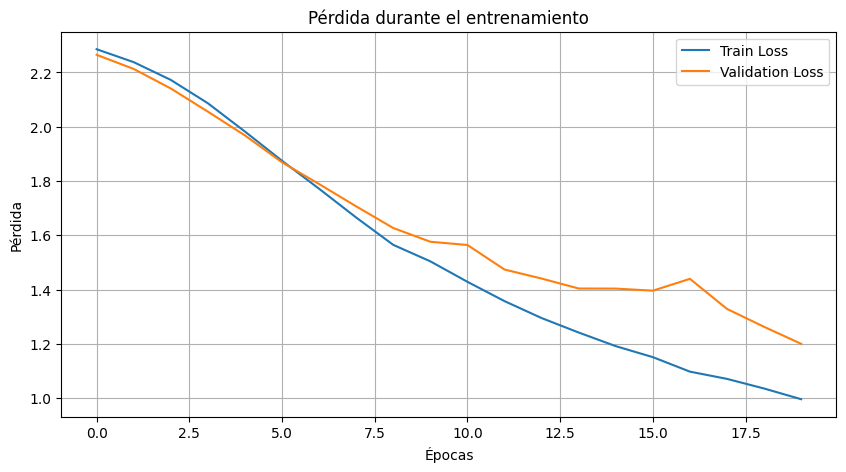

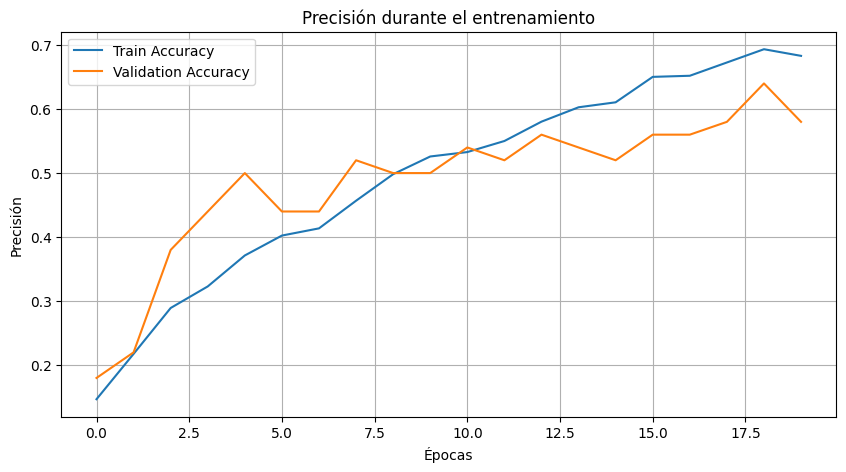

In [11]:
import matplotlib.pyplot as plt

num_epochs = 20  # Set the number of epochs

# Listas para almacenar las métricas
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    # Cada época tiene una fase de entrenamiento y validación
    for phase in ['train', 'valid']:
        if phase == 'train':
            model.train()  # Configurar el modelo en modo de entrenamiento
        else:
            model.eval()   # Configurar el modelo en modo de evaluación

        running_loss = 0.0
        running_corrects = 0

        # Iterar sobre los datos
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Cero los gradientes de los parámetros
            optimizer.zero_grad()

            # Paso hacia adelante
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Paso hacia atrás y optimización en la fase de entrenamiento
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # Estadísticas
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        # Calcular la pérdida y precisión de la época
        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Almacenar las métricas
        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc.item())
        else:
            valid_losses.append(epoch_loss)
            valid_accuracies.append(epoch_acc.item())

print('Training complete')

# Graficar las métricas
# Graficar pérdida
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar precisión
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()










Guardamos el modelo Baseline

In [13]:
torch.save(model.state_dict(), 'butterfly_classifier_baseline.pth')

## Modelo de CNN Baseline con modificaciones en Hyperparametros

En el ajuste de hiperparametros vamos a considerar:

-   Modificacion en la tasa de aprendizaje
-   Optimizador ADAM
-   Regularización: Weight Decay
-   Bajamos el Dropout a 0.3 al definir el modelo

In [16]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            # Convolutional Layer 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # Convolutional Layer 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # Convolutional Layer 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        # Flatten the tensor
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Initialize the model
model_mejorado = SimpleCNN(num_classes=num_classes)

Implementamos learning rate scheduler y weight decay y entrenamos el modelo

Epoch 1/20
----------
Train Loss: 2.2813 Acc: 0.2763
Valid Loss: 1.5705 Acc: 0.5000
Epoch 2/20
----------
Train Loss: 1.2693 Acc: 0.5587
Valid Loss: 1.4333 Acc: 0.6200
Epoch 3/20
----------
Train Loss: 0.8860 Acc: 0.7090
Valid Loss: 0.8828 Acc: 0.7000
Epoch 4/20
----------
Train Loss: 0.5476 Acc: 0.8195
Valid Loss: 0.6508 Acc: 0.8000
Epoch 5/20
----------
Train Loss: 0.3634 Acc: 0.8869
Valid Loss: 0.6345 Acc: 0.8200
Epoch 6/20
----------
Train Loss: 0.1991 Acc: 0.9473
Valid Loss: 0.5641 Acc: 0.8000
Epoch 7/20
----------
Train Loss: 0.1501 Acc: 0.9594
Valid Loss: 0.5442 Acc: 0.8200
Epoch 8/20
----------
Train Loss: 0.1289 Acc: 0.9672
Valid Loss: 0.5860 Acc: 0.7800
Epoch 9/20
----------
Train Loss: 0.1135 Acc: 0.9646
Valid Loss: 0.5802 Acc: 0.7800
Epoch 10/20
----------
Train Loss: 0.0931 Acc: 0.9819
Valid Loss: 0.5785 Acc: 0.7800
Epoch 11/20
----------
Train Loss: 0.0863 Acc: 0.9784
Valid Loss: 0.5800 Acc: 0.7800
Epoch 12/20
----------
Train Loss: 0.0743 Acc: 0.9810
Valid Loss: 0.5815 A

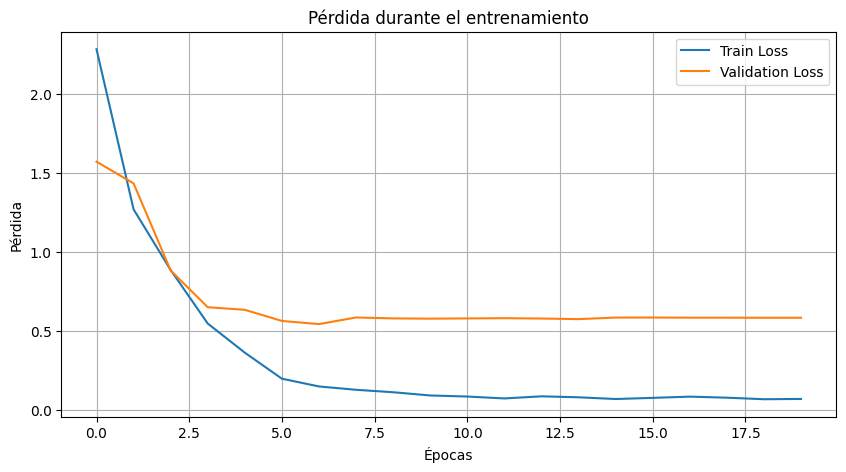

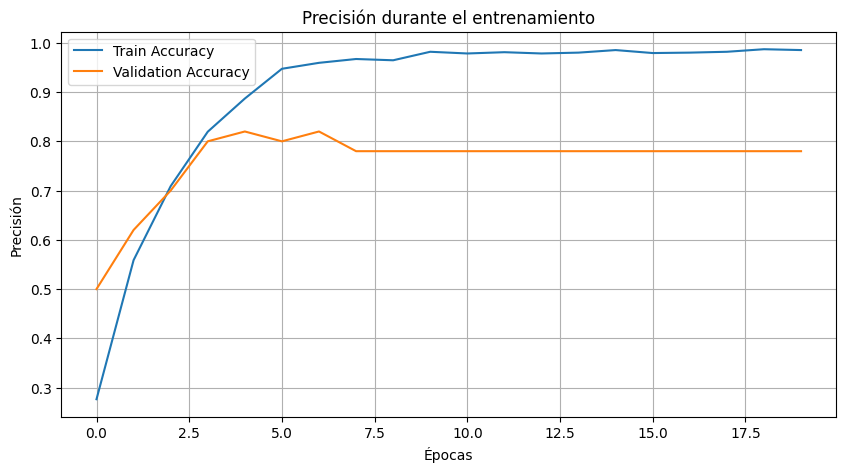

In [17]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Definir el optimizador con weight decay
optimizer = optim.Adam(model_mejorado.parameters(), lr=0.001, weight_decay=1e-5)

# Definir el scheduler: reduce la tasa de aprendizaje cada 5 épocas
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

num_epochs = 20  # Número de épocas

# Listas para almacenar las métricas
train_losses, train_accuracies = [], []
valid_losses, valid_accuracies = [], []

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    # Fases de entrenamiento y validación
    for phase in ['train', 'valid']:
        if phase == 'train':
            model_mejorado.train()
        else:
            model_mejorado.eval()

        running_loss = 0.0
        running_corrects = 0

        # Iterar sobre los datos
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Limpiar gradientes

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model_mejorado(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()  # Retropropagación
                    optimizer.step()  # Actualización del optimizador

            # Acumular estadísticas
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        # Calcular pérdida y precisión de la época
        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Almacenar métricas
        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc.item())
        else:
            valid_losses.append(epoch_loss)
            valid_accuracies.append(epoch_acc.item())

    # Actualizar la tasa de aprendizaje del scheduler al final de cada época
    scheduler.step()

print('Training complete')

# Graficar la pérdida
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la precisión
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
model_mejorado.eval()  # Set model to evaluate mode
running_corrects = 0

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_mejorado(inputs)
        _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)

test_acc_mejorado = running_corrects.double() / len(image_datasets['test'])
print(f'Test Accuracy: {test_acc_mejorado:.4f}')

Test Accuracy: 0.8400


Guardamos el modelo Baseline con mejoras en hyperparametros

In [19]:
torch.save(model_mejorado.state_dict(), 'butterfly_classifier_baseline_mejorado.pth')

## Modelo de CNN con Transfer Learning (ResNet18) y learning rate scheduler

In [20]:
# Use a pre-trained model_resnet18 for better performance
model_resnet18 = models.resnet18(pretrained=True)
num_ftrs = model_resnet18.fc.in_features
model_resnet18.fc = nn.Linear(num_ftrs, num_classes)

# Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_resnet18 = model_resnet18.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet18.parameters(), lr=0.001)

# Define the scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


c:\Users\jzerda\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jzerda\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Entrenamos el Modelo

Epoch 1/20
----------
Learning Rate: 0.001
Train Loss: 0.2933 Acc: 0.9076
Valid Loss: 0.7862 Acc: 0.7800
Epoch 2/20
----------
Learning Rate: 0.001
Train Loss: 0.2192 Acc: 0.9318
Valid Loss: 0.1153 Acc: 0.9800
Epoch 3/20
----------
Learning Rate: 0.001
Train Loss: 0.1254 Acc: 0.9715
Valid Loss: 0.5397 Acc: 0.8800
Epoch 4/20
----------
Learning Rate: 0.001
Train Loss: 0.1929 Acc: 0.9447
Valid Loss: 0.1350 Acc: 0.9400
Epoch 5/20
----------
Learning Rate: 0.001
Train Loss: 0.0920 Acc: 0.9741
Valid Loss: 0.1130 Acc: 0.9400
Epoch 6/20
----------
Learning Rate: 0.001
Train Loss: 0.1615 Acc: 0.9568
Valid Loss: 0.1879 Acc: 0.9400
Epoch 7/20
----------
Learning Rate: 0.001
Train Loss: 0.0790 Acc: 0.9793
Valid Loss: 0.0421 Acc: 0.9600
Epoch 8/20
----------
Learning Rate: 0.0001
Train Loss: 0.0348 Acc: 0.9888
Valid Loss: 0.0022 Acc: 1.0000
Epoch 9/20
----------
Learning Rate: 0.0001
Train Loss: 0.0107 Acc: 1.0000
Valid Loss: 0.0016 Acc: 1.0000
Epoch 10/20
----------
Learning Rate: 0.0001
Train Lo

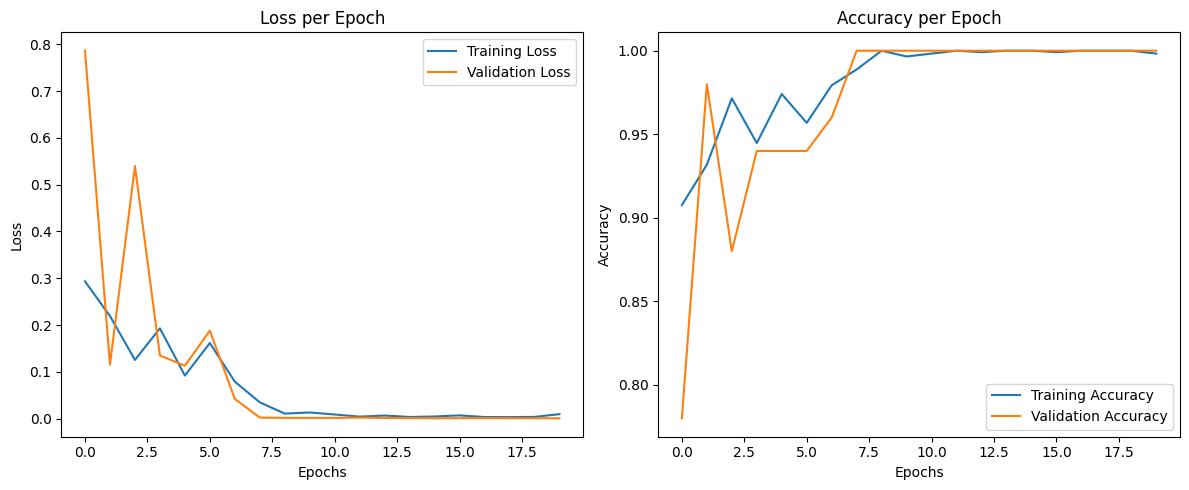

Training complete


In [21]:
import matplotlib.pyplot as plt

# Number of epochs
num_epochs = 20

# Lists to store metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

# Training loop
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    print(f'Learning Rate: {scheduler.get_last_lr()[0]}')

    # Each epoch has a training and validation phase
    for phase in ['train', 'valid']:
        if phase == 'train':
            model_resnet18.train()  # Training mode
        else:
            model_resnet18.eval()   # Evaluation mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model_resnet18(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Backward and optimize
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        # Calculate loss and accuracy
        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Save the metrics for plotting
        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc.item())
        else:
            valid_losses.append(epoch_loss)
            valid_accuracies.append(epoch_acc.item())

    # Step the scheduler
    scheduler.step()

# Plotting the metrics
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), valid_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(num_epochs), valid_accuracies, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print('Training complete')


Guardamos el modelo con transfer learning y learning rate scheduler

In [23]:
torch.save(model_resnet18.state_dict(), 'butterfly_classifier_resnet18_LRScheduler.pth')

## Modelo de CNN con Transfer Learning (DenseNet121) y learning rate scheduler

Configuro el Modelo DenseNet121

In [24]:
# Definir el dispositivo (CPU o GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Cargar el modelo pre-entrenado DenseNet121
model_densenet121 = models.densenet121(pretrained=True)

# Congelar las capas de características (opcional)
for param in model_densenet121.features.parameters():
    param.requires_grad = False

# Reemplazar la capa clasificador para que coincida con el número de clases
model_densenet121.classifier = nn.Linear(in_features=1024, out_features=num_classes)

# Transferir el modelo al dispositivo
model_densenet121 = model_densenet121.to(device)

c:\Users\jzerda\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jzerda\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Defino la funcion de perdida y optimizador

In [25]:
# Definir la función de pérdida
criterion = nn.CrossEntropyLoss()

# Definir el optimizador (solo optimiza los parámetros del clasificador)
optimizer = optim.Adam(model_densenet121.classifier.parameters(), lr=0.001)

# Definir el scheduler de la tasa de aprendizaje
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

Entreno el modelo

Epoch 1/20
----------
Learning Rate: 0.001000
Train Loss: 1.4180 Acc: 0.6641
Valid Loss: 0.6482 Acc: 0.9400
Epoch 2/20
----------
Learning Rate: 0.001000
Train Loss: 0.4654 Acc: 0.9611
Valid Loss: 0.2927 Acc: 0.9800
Epoch 3/20
----------
Learning Rate: 0.001000
Train Loss: 0.2543 Acc: 0.9810
Valid Loss: 0.1854 Acc: 0.9800
Epoch 4/20
----------
Learning Rate: 0.001000
Train Loss: 0.1759 Acc: 0.9888
Valid Loss: 0.1352 Acc: 0.9800
Epoch 5/20
----------
Learning Rate: 0.001000
Train Loss: 0.1324 Acc: 0.9888
Valid Loss: 0.1121 Acc: 0.9800
Epoch 6/20
----------
Learning Rate: 0.001000
Train Loss: 0.0998 Acc: 0.9931
Valid Loss: 0.0961 Acc: 0.9800
Epoch 7/20
----------
Learning Rate: 0.001000
Train Loss: 0.0859 Acc: 0.9940
Valid Loss: 0.0787 Acc: 0.9800
Epoch 8/20
----------
Learning Rate: 0.000100
Train Loss: 0.0718 Acc: 0.9965
Valid Loss: 0.0751 Acc: 0.9800
Epoch 9/20
----------
Learning Rate: 0.000100
Train Loss: 0.0715 Acc: 0.9983
Valid Loss: 0.0735 Acc: 0.9800
Epoch 10/20
----------
Learn

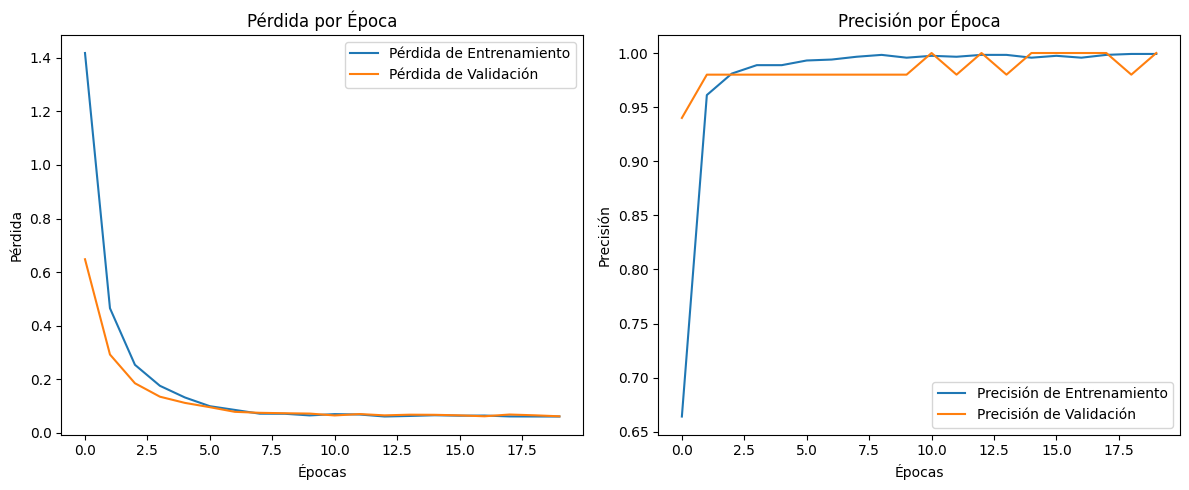

Entrenamiento completo


In [26]:
import matplotlib.pyplot as plt

num_epochs = 20

# Listas para almacenar métricas
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    print(f'Learning Rate: {scheduler.get_last_lr()[0]:.6f}')

    # Cada época tiene una fase de entrenamiento y validación
    for phase in ['train', 'valid']:
        if phase == 'train':
            model_densenet121.train()  # Modo entrenamiento
        else:
            model_densenet121.eval()   # Modo evaluación

        running_loss = 0.0
        running_corrects = 0

        # Iterar sobre los datos
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Inicializar gradientes
            optimizer.zero_grad()

            # Habilitar o deshabilitar gradientes según la fase
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model_densenet121(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Backpropagation y optimización solo en fase de entrenamiento
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # Estadísticas
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        # Calcular pérdida y precisión por época
        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Guardar las métricas para graficar
        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc.item())
        else:
            valid_losses.append(epoch_loss)
            valid_accuracies.append(epoch_acc.item())

    # Actualizar el scheduler
    scheduler.step()

# Graficar las métricas
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Pérdida de Entrenamiento')
plt.plot(range(num_epochs), valid_losses, label='Pérdida de Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Precisión de Entrenamiento')
plt.plot(range(num_epochs), valid_accuracies, label='Precisión de Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

print('Entrenamiento completo')


Evaluo el modelo con los datos de Test

In [27]:
model_densenet121.eval()
running_corrects = 0

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_densenet121(inputs)
        _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)

test_acc = running_corrects.double() / len(image_datasets['test'])
print(f'Precisión en Test: {test_acc:.4f}')

Precisión en Test: 1.0000


Guardo el modelo entrenado

In [28]:
torch.save(model_densenet121.state_dict(), 'butterfly_classifier_densenet121.pth')

## Conclusiones y Analisis

### Modelo de CNN BASELINE

El modelo presenta una pobre performance y la podemos atribuir a lo siguiente:

-   Estamos utilizando el optimizador SGD con una tasa de aprendizaje de 0.001. Aunque SGD es un optimizador común, puede ser más lento en la convergencia en comparación con otros como Adam, que adaptan la tasa de aprendizaje en función del gradiente. Para mejorar la performance en el siguiente punto probaremos con Adam.
-   La red no esté convergiendo correctamente. Las curvas de pérdida no muestran una disminución consistente y las curvas de precisión no mejoran, esto podría indicar que el optimizador o la tasa de aprendizaje no son adecuados. Vamos a ajustar estos hiperparámetros y usar estrategias como reducción de la tasa de aprendizaje en función de la validación.

### Modelo de CNN BASELINE con tunning de hyperparametros

Al modelo Baseline realizamos los siguientes cambios y se notaron los beneficios:

-   Uso de Adam como Optimizador:

Adam es un optimizador que combina las ventajas de otros optimizadores (como Adagrad y RMSprop). Se adapta automáticamente a la tasa de aprendizaje de cada parámetro, lo que puede resultar en una convergencia más rápida y eficiente, especialmente en redes profundas.

-   Agregamos regularizacion L2 Weight Decay:

La adición de weight_decay (también conocido como regularización L2) ayuda a prevenir el sobreajuste al penalizar grandes pesos en la red. Esto puede resultar en un modelo más generalizable.

-   Scheduler para la Tasa de Aprendizaje:

La implementación de un scheduler que reduce la tasa de aprendizaje cada 5 épocas permite que el modelo se ajuste más finamente a medida que entrena. Esto es útil para estabilizar el entrenamiento y mejorar la convergencia hacia el final de la formación.
Reducción de la Tasa de Dropout:

-   Redujimos la tasa de Dropout a 0.3

Esto puede ser un equilibrio mejor para mantener la capacidad del modelo mientras se evita el sobreajuste. En algunos casos, una tasa de Dropout más baja puede permitir que la red aprenda características más relevantes sin perder demasiada información.

### Modelo de CNN usando Transfer Learning con modelos pre-entrenados ResNet18 y DenseNet121

Utilizar un modelo preentrenado como ResNet-18 o DenseNet121 ha demostrado mejorar significativamente el rendimiento de la red neuronal. En ambos podemos ver una performance similar. Esto puede ocurrir por:

1. Transferencia de Aprendizaje:

Al utilizar un modelo preentrenado, aprovechamos el conocimiento adquirido durante el entrenamiento en un conjunto de datos grande y diverso, como ImageNet. Este aprendizaje previo ayuda a la red a reconocer características relevantes en las imágenes, lo que es especialmente útil en tareas con conjuntos de datos más pequeños o menos variados.

2. Arquitectura Avanzada:

ResNet-18 y DenseNet121 son arquitecturas profundas que utiliza conexiones de salto (skip connections), lo que permite el flujo de gradientes durante el entrenamiento y ayuda a mitigar el problema del desvanecimiento del gradiente. Esto permite que el modelo aprenda representaciones más complejas y profundas de los datos.

3. Menos Necesidad de Datos:

Dado que el modelo ya ha aprendido características generales, a menudo se requiere menos datos para entrenar eficazmente. Esto significa que incluso si tu conjunto de datos es pequeño, el modelo preentrenado puede generalizar mejor y obtener un mejor rendimiento en la tarea específica.

4. Convergencia Más Rápida:

Los modelos preentrenados suelen converger más rápidamente durante el entrenamiento, ya que empiezan con pesos que ya están bien ajustados. Esto puede resultar en una reducción del tiempo total de entrenamiento necesario para alcanzar un rendimiento óptimo.

5. Mejora de la Precisión:

La mayoría de las veces, los modelos preentrenados logran una precisión más alta en comparación con las redes entrenadas desde cero. Esto es especialmente evidente en conjuntos de imagenes, donde los modelos simples pueden no ser suficientes para lograr un buen rendimiento.

6. Ajuste Fino:

Como reemplazamos la capa final del modelo (la capa completamente conectada) para adaptarse al número de clases específicas de tu tarea, pudimos realizar un ajuste fino (fine-tuning) que permite que el modelo ajuste sus pesos para las características específicas del nuevo conjunto de datos.

### Observaciones

Podemos ver que a excepción del modelo Baseline, en todos los demas (Baseline con Hyperparametros y los modelos de TransferLearning) hay sobreajuste.